In [0]:
#Installing dependencies for RDKit
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-12-08 05:43:36--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
    - conda==4.7.12=py37_0
    - cryptography==2.8=py37h1ba5d50_0
    - idna==2.8=py37_0
    - lib

In [0]:
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
root = "/content/drive/My Drive/dsb2/"



In [0]:
file_list = os.listdir(root)

num_mols = len(file_list)
print(num_mols)

13000


In [0]:
def read_xyz(file_name):
    with open(file_name, 'rb') as file:
        num_atoms = int(file.readline())
        properties = file.readline().split()[5:17] # only take the properties used in the experiments 
        properties = [num.replace(b'*^', b'e') for num in properties] 
        properties = [float(prop) for prop in properties]
        atom_types = [0]*num_atoms
        coords = np.array(np.zeros([num_atoms,3]))
        for na in range(num_atoms):
            coord_line = file.readline().split()
            atom_types[na] = coord_line[0]
            xyz_coords = coord_line[1:4]
            xyz_coords = [num.replace(b'*^', b'e') for num in xyz_coords] 
            coords[na,:] = [float(num) for num in xyz_coords]  
        vib_freqs = file.readline()
        smiles = file.readline().split()[0]
        inchis = file.readline()
        
    return smiles, properties, atom_types, coords


In [0]:
import concurrent.futures
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import as_completed

In [0]:
import multiprocessing as mp
import numpy as np
from multiprocessing.pool import ThreadPool
import time


start = time.time()
N= mp.cpu_count()
files = os.scandir(root)
print (N)
with mp.pool.ThreadPool(processes = 8) as p:
        results= p.map(read_xyz, [root+file.name for file in files])
        #print (results[1][2])
      
end = time.time()
print(end - start)

2
481.15509247779846


In [0]:
print(len(results))

13000


In [0]:
def column(matrix, i):
    return [row[i] for row in matrix]

smiles =column(results,0)
properties =column(results,1)
atom_types =column(results,2)
coords = column(results,3)

In [0]:
#Data exploration
print(smiles[1])
print(properties[1])
print(atom_types[1])
print(coords[1])

b'CC1(O)C=CC2OC12'
[1.8866, 64.52, -0.2485, -0.0075, 0.2409, 794.2784, 0.129457, -383.721976, -383.71463, -383.713685, -383.753023, 28.544]
[b'C', b'C', b'O', b'C', b'C', b'C', b'O', b'C', b'H', b'H', b'H', b'H', b'H', b'H', b'H', b'H']
[[-0.06341412  1.56275908  0.03506823]
 [ 0.00561536  0.03456272 -0.01205842]
 [-1.30159989 -0.54324469  0.03859584]
 [ 0.81463752 -0.48687451 -1.19581887]
 [ 1.81354605 -1.28946524 -0.82298699]
 [ 1.86092036 -1.3929298   0.66677517]
 [ 2.09945262 -0.11784784  1.31977992]
 [ 0.75759285 -0.57216935  1.17934164]
 [ 0.9381555   1.98636251  0.13946968]
 [-0.51133516  1.95869054 -0.88413381]
 [-0.67889015  1.88266485  0.8809463 ]
 [-1.80625322 -0.2045079  -0.70848753]
 [ 0.59397466 -0.18025257 -2.21376596]
 [ 2.52380852 -1.77595518 -1.48019413]
 [ 2.27026821 -2.25559632  1.18237105]
 [ 0.20604051 -0.78087806  2.09198005]]


In [0]:
for im in range(num_mols):
    smiles[im], properties[im], atom_types[im], coords[im] = read_xyz(root+file_list[im])

biggest_mol_size = max([len(atom_list) for atom_list in atom_types])

print("size of largest molecule = ", biggest_mol_size)

size of largest molecule =  26


In [0]:
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 

In [0]:
DrawingOptions.bondLineWidth=2.0
sample= Chem.MolFromSmiles(smiles[1])

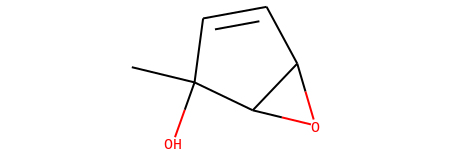

In [0]:
sample

In [0]:
from rdkit import Chem

mol_list = [Chem.AddHs(Chem.MolFromSmiles(smile)) for smile in smiles]

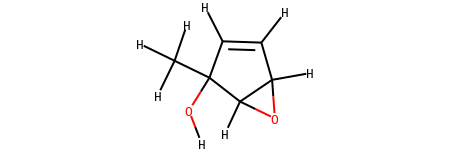

In [0]:
#Represent molecule with hydrogen explicitly 
mol_list[1]

In [0]:
!git clone https://github.com/bmbodj/mmltoolkit.git

Cloning into 'mmltoolkit'...
remote: Enumerating objects: 205, done.
remote: Total 205 (delta 0), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (205/205), 78.42 KiB | 9.80 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [0]:
!ls mmltoolkit

examples  LICENSE  mmltoolkit  README.md  setup.py


In [0]:
# Add these modules to my mounted path
sys.path.append('/content/drive/My Drive/')

In [0]:
file_name=[0]*num_mols

for im in range(num_mols):
   file_name[im]=root+file_list[im]

In [0]:
import numpy as np
import copy
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem.rdmolops import Get3DDistanceMatrix, GetAdjacencyMatrix, GetDistanceMatrix
from rdkit.Chem.Graphs import CharacteristicPolynomial
from rdkit.Chem.Descriptors import _descList
from collections import defaultdict
from mmltoolkit.mmltoolkit.fingerprints import truncated_Estate_featurizer
from mmltoolkit.mmltoolkit.descriptors import RDKit_descriptor_featurizer
from mmltoolkit.mmltoolkit.functional_group_featurizer import functional_group_featurizer
atom_num_dict = {'C':6,'N':7,'O':8,'H':1,'F':9, 'Cl': 17, 'S': 16 }

def coulombmat_and_eigenvalues_as_vec(filename, padded_size, sort=True):
    """
    returns Coulomb matrix and **sorted** Coulomb matrix eigenvalues
    Args:
        filename : (string) the .xyz input filename for the molecule
        padded_size : the number of atoms in the biggest molecule to be considered (same as padded eigenvalue vector length)
    Returns:
        (Eigenvalues vector, Coulomb matrix vector) as Numpy arrays
    """
    xyzfile = open(filename, 'r',encoding="utf-8")
    num_atoms_file = int(xyzfile.readline())
    skipline=xyzfile.readline()
    Cmat = np.zeros((num_atoms_file,num_atoms_file))
    xyzmatrix =np.array(np.zeros([num_atoms_file,3]))
    atom_symbols = [0]*num_atoms_file
    for na in range(num_atoms_file):
            coord_line =xyzfile.readline().split()
            atom_symbols[na] = coord_line[0]
            xyz_coords = coord_line[1:4] 
            xyz_coords = [num.replace('*^', 'e') for num in xyz_coords] 
            xyzmatrix[na,:] = [float(num) for num in xyz_coords] 
    xyzfile.close()
    chargearray = [atom_num_dict[symbol] for symbol in atom_symbols]

    for i in range(num_atoms_file):
        for j in range(num_atoms_file):
            if i == j:
                Cmat[i,j]=0.5*chargearray[i]**2.4   # Diagonal terms
            else:
                dist=np.linalg.norm(xyzmatrix[i,:] - xyzmatrix[j,:])
                Cmat[i,j]=chargearray[i]*chargearray[j]/dist   #Pair-wise repulsion

    Cmat_eigenvalues = np.linalg.eigvals(Cmat)

    if (sort): Cmat_eigenvalues = sorted(Cmat_eigenvalues, reverse=True) #sort

    Cmat_as_vec = []
    for i in range(num_atoms_file):
        for j in range(num_atoms_file):
            if (j>=i):
                Cmat_as_vec += [Cmat[i,j]]

    pad_width = (padded_size**2 - padded_size)//2 + padded_size - ((num_atoms_file**2 - num_atoms_file)//2 + num_atoms_file)
    Cmat_as_vec = Cmat_as_vec + [0]*pad_width

    Cmat_as_vec = np.array(Cmat_as_vec)

    pad_width = padded_size - num_atoms_file
    Cmat_eigenvalues = np.pad(Cmat_eigenvalues, ((0, pad_width)), mode='constant')

    return Cmat_eigenvalues, Cmat_as_vec

In [0]:
# Generate Coulomb as both eigenvalues and regular vectors 
cmat_eigs = np.zeros([num_mols, 26])
cmat = np.zeros([num_mols, 351])
cmat.shape
for im in range(num_mols):
    cmat_eigs[im,:], cmat[im,:]  =  coulombmat_and_eigenvalues_as_vec(file_name[im], biggest_mol_size)

In [0]:
cmat_eigs

array([[180.34734696,  61.13653058,  38.52198125, ...,   0.        ,
          0.        ,   0.        ],
       [189.87171238,  66.89868493,  41.35183175, ...,   0.        ,
          0.        ,   0.        ],
       [176.09370315,  54.76016155,  36.64545925, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [181.44374539,  55.18042723,  45.11688982, ...,   0.        ,
          0.        ,   0.        ],
       [182.44814781,  59.66453277,  58.68250097, ...,   0.        ,
          0.        ,   0.        ],
       [174.63028455,  52.94322974,  42.66139475, ...,   0.        ,
          0.        ,   0.        ]])

In [0]:
print(cmat_eigs.shape)

(13000, 26)


In [0]:
import pandas as pd
import numpy as np

In [0]:
dtype = [('Col1','int32'), ('Col2','float32'), ('Col3','float32'),('Col4','int32'), ('Col5','float32'), ('Col6','float32'),('Col7','int32'), ('Col8','float32'), ('Col9','float32'),('Col10','int32'), ('Col11','float32'), ('Col12','float32'),('Col13','float32'), ('Col14','float32'),('Col15','float32'), ('Col16','float32'),('Col17','float32')]
values = properties
index = ['Row'+str(i) for i in range(1, len(values)+1)]

df = pd.DataFrame(values, index=index)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
Row1,0.3676,68.74,-0.2352,0.0065,0.2417,814.7537,0.142229,-363.839405,-363.831976,-363.831032,-363.870471,29.280
Row2,1.8866,64.52,-0.2485,-0.0075,0.2409,794.2784,0.129457,-383.721976,-383.714630,-383.713685,-383.753023,28.544
Row3,1.7780,73.30,-0.2542,0.0838,0.3380,883.2429,0.177401,-349.011613,-349.003832,-349.002888,-349.042983,30.929
Row4,1.2074,73.61,-0.2583,0.0729,0.3312,881.9664,0.177890,-349.011971,-349.004251,-349.003307,-349.043189,31.339
Row5,2.1403,66.86,-0.2510,0.0868,0.3378,831.9533,0.152815,-384.933448,-384.925779,-384.924835,-384.964883,29.600


In [0]:
len(df)

13000

In [0]:
y_mu_original=df[df.columns[0]]
y_alpha_original=df[df.columns[1]]
y_homo_original=df[df.columns[2]]
y_lumo_original=df[df.columns[3]]
y_gap_original=df[df.columns[4]]
y_R2_original=df[df.columns[5]]
y_zpve_original=df[df.columns[6]]
y_u0_original=df[df.columns[7]]
y_u_original=df[df.columns[8]]
y_h_original=df[df.columns[9]]
y_g_original=df[df.columns[10]]
y_cv_original=df[df.columns[11]]

In [0]:
print(y_mu_original.mean())
print(y_alpha_original.mean())
print(y_homo_original.mean())
print(y_lumo_original.mean())
print(y_gap_original.mean())
print(y_R2_original.mean())
print(y_zpve_original.mean())
print(y_u0_original.mean())
print(y_u_original.mean())
print(y_h_original.mean())
print(y_g_original.mean())
print(y_cv_original.mean())

2.6208590538461416
65.3638292307689
-0.2448003230769218
0.013337476923076887
0.2581376307692299
955.4662350153832
0.1321418784615383
-360.48039873907845
-360.4725528390758
-360.4716086518468
-360.51276671792044
28.417438230769243


In [0]:
print(y_mu_original.std())
print(y_alpha_original.std())
print(y_homo_original.std())
print(y_lumo_original.std())
print(y_gap_original.std())
print(y_R2_original.std())
print(y_zpve_original.std())
print(y_u0_original.std())
print(y_u_original.std())
print(y_h_original.std())
print(y_g_original.std())
print(y_cv_original.std())

1.505066053597753
8.968654582857408
0.025137685533687216
0.047528939266441986
0.04864815968886159
246.86374348679843
0.03361785349322071
43.490377935992434
43.489925214476855
43.48992521019698
43.49123697352441
4.545093871525309


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled=scaler.fit_transform(df)
df = pd.DataFrame(data_scaled , index=index)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
Row1,-1.497174,0.376456,0.381924,-0.143865,-0.337901,-0.570023,0.300064,-0.077239,-0.077249,-0.077249,-0.077207,0.189786
Row2,-0.487877,-0.094090,-0.147182,-0.438433,-0.354346,-0.652968,-0.079868,-0.534428,-0.534445,-0.534445,-0.534387,0.027847
Row3,-0.560036,0.884913,-0.373942,1.482575,1.641695,-0.292575,1.346334,0.263719,0.263720,0.263720,0.263736,0.552609
Row4,-0.939170,0.919479,-0.537050,1.253233,1.501910,-0.297746,1.360880,0.263710,0.263710,0.263710,0.263732,0.642819
Row5,-0.319307,0.166829,-0.246638,1.545697,1.637584,-0.500348,0.614968,-0.562285,-0.562295,-0.562295,-0.562253,0.260194


In [0]:
from sklearn import preprocessing
X=cmat_eigs
y_mu=df[df.columns[0]]
y_alpha=df[df.columns[1]]
y_homo=df[df.columns[2]]
y_lumo=df[df.columns[3]]
y_gap=df[df.columns[4]]
y_R2=df[df.columns[5]]
y_zpve=df[df.columns[6]]
y_u0=df[df.columns[7]]
y_u=df[df.columns[8]]
y_h=df[df.columns[9]]
y_g=df[df.columns[10]]
y_cv=df[df.columns[11]]

In [0]:
print(y_mu.mean())
print(y_alpha.mean())
print(y_homo.mean())
print(y_lumo.mean())
print(y_gap.mean())
print(y_R2.mean())
print(y_zpve.mean())
print(y_u0.mean())
print(y_u.mean())
print(y_h.mean())
print(y_g.mean())
print(y_cv.mean())

1.5978671377489754e-16
-5.017695660678957e-16
-6.3860028376439e-16
6.803105087818459e-17
-4.1445479526968342e-16
-6.09478279810761e-16
4.629800816229153e-16
-8.444697932383441e-16
-1.3275363714298622e-15
-3.1954780701845755e-16
1.6757279324836488e-15
5.0387044963757104e-18


In [0]:
print(y_mu.std())
print(y_alpha.std())
print(y_homo.std())
print(y_lumo.std())
print(y_gap.std())
print(y_R2.std())
print(y_zpve.std())
print(y_u0.std())
print(y_u.std())
print(y_h.std())
print(y_g.std())
print(y_cv.std())

1.0000384637575404
1.000038463757541
1.0000384637575386
1.000038463757541
1.0000384637575381
1.000038463757538
1.00003846375754
1.0000384637575395
1.0000384637575388
1.0000384637575417
1.0000384637575381
1.0000384637575388


In [0]:
# Split X and y into training and testing/validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_mu, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
#Kernel ridge regression 
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_mu=clf.predict(X_test)

In [0]:
# Import metrics to calculate accuracy
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [0]:
print("Mean absolute for kernel ridge regression :")
mae_mu = mean_absolute_error(y_test,y_pred_krr_mu)
print(mae_mu)

Mean absolute for kernel ridge regression :
0.5735505051087096


In [0]:
print("Mean absolute for kernel ridge regression :")
mae_muc = mean_absolute_error(y_test *y_mu_original.std(),y_pred_krr_mu *  y_mu_original.std())
print(mae_muc)

Mean absolute for kernel ridge regression :
0.8632313952629634


In [0]:
# Split X and y into training and testing/validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_alpha, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
X_scaled = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_traindtm=scaler.transform(X_train) 
X_testdtm=scaler.transform(X_test)

In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_traindtm, y_train)
y_pred_krr_alpha=clf.predict(X_testdtm)

In [0]:
mae_alpha = mean_absolute_error(y_test,y_pred_krr_alpha)
print(mae_alpha)

0.1268548067167793


In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_alphac = mean_absolute_error(y_test * y_alpha_original.std(),y_pred_krr_alpha * y_alpha_original.std() )
print(mae_alphac)

Mean absolute error for kernel ridge regression :
1.1377169436179333


In [0]:
# Split X and y into training and testing/validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_homo, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_homo=clf.predict(X_test)

In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_homo = mean_absolute_error(y_test,y_pred_krr_homo)
print(mae_homo)

Mean absolute error for kernel ridge regression :
0.44127567060499107


In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_homoc = mean_absolute_error(y_test * y_homo_original.std() ,y_pred_krr_homo * y_homo_original.std())
print(mae_homoc)

Mean absolute error for kernel ridge regression :
0.011092649041335209


In [0]:
# Split X and y into training and testing/validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_lumo, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_lumo=clf.predict(X_test)

In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_lumo = mean_absolute_error(y_test ,y_pred_krr_lumo )
print(mae_lumo)

Mean absolute error for kernel ridge regression :
0.350065886005344


In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_lumoc = mean_absolute_error(y_test * y_lumo_original.std(),y_pred_krr_lumo * y_lumo_original.std())
print(mae_lumoc)

Mean absolute error for kernel ridge regression :
0.016638260235201197


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_gap, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_gap=clf.predict(X_test)

In [0]:
print("Mean absolute for kernel ridge regression :")
mae_gap = mean_absolute_error(y_test,y_pred_krr_gap)
print(mae_gap)

Mean absolute for kernel ridge regression :
0.41625079498535933


In [0]:
print("Mean absolute for kernel ridge regression :")
mae_gapc = mean_absolute_error(y_test * y_gap_original.std(),y_pred_krr_gap * y_gap_original.std())
print(mae_gapc)

Mean absolute for kernel ridge regression :
0.020249835145063348


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_R2, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_R2=clf.predict(X_test)

In [0]:
print("Mean absolute for kernel ridge regression :")
mae_R2 = mean_absolute_error(y_test,y_pred_krr_R2)
print(mae_R2 )

Mean absolute for kernel ridge regression :
0.1975295555866412


In [0]:
print("Mean absolute for kernel ridge regression :")
mae_R2c = mean_absolute_error(y_test * y_R2_original.std(),y_pred_krr_R2 *y_R2_original.std())
print(mae_R2c)

Mean absolute for kernel ridge regression :
48.762885541401886


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_zpve, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_zpve=clf.predict(X_test)

In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_zpve = mean_absolute_error(y_test,y_pred_krr_zpve)
print(mae_zpve)

Mean absolute error for kernel ridge regression :
0.07240885424927691


In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_zpvec = mean_absolute_error(y_test * y_zpve_original.std(),y_pred_krr_zpve *  y_zpve_original.std())
print(mae_zpvec)

Mean absolute error for kernel ridge regression :
0.0024342302537641637


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_u0, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_u0=clf.predict(X_test)

In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_u0 = mean_absolute_error(y_test,y_pred_krr_u0)
print(mae_u0)

Mean absolute error for kernel ridge regression :
0.014723854190936898


In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_u0c = mean_absolute_error(y_test * y_u0_original.std(),y_pred_krr_u0 * y_u0_original.std())
print(mae_u0c)

Mean absolute error for kernel ridge regression :
0.6403459834382917


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_u, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_u=clf.predict(X_test)

In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_u = mean_absolute_error(y_test,y_pred_krr_u)
print(mae_u)

Mean absolute error for kernel ridge regression :
0.01472380904657109


In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_uc = mean_absolute_error(y_test * y_u_original.std(),y_pred_krr_u * y_u_original.std())
print(mae_uc)

Mean absolute error for kernel ridge regression :
0.6403373543076144


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_h, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_h=clf.predict(X_test)

In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_h = mean_absolute_error(y_test,y_pred_krr_h)
print(mae_h)

Mean absolute error for kernel ridge regression :
0.014723808937068927


In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_hc = mean_absolute_error(y_test * y_h_original.std(),y_pred_krr_h * y_h_original.std())
print(mae_hc)

Mean absolute error for kernel ridge regression :
0.6403373494823577


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_g, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_g=clf.predict(X_test)

In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_g = mean_absolute_error(y_test,y_pred_krr_g)
print(mae_g)

Mean absolute error for kernel ridge regression :
0.014724454087464657


In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_gc = mean_absolute_error(y_test * y_g_original.std(),y_pred_krr_g * y_g_original.std())
print(mae_gc)

Mean absolute error for kernel ridge regression :
0.6403847220237056


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cv, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 26)
(1950, 26)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_cv=clf.predict(X_test)

In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_cv = mean_absolute_error(y_test,y_pred_krr_cv)
print(mae_cv)

Mean absolute error for kernel ridge regression :
0.13346424234699003


In [0]:
print("Mean absolute error for kernel ridge regression :")
mae_cvc = mean_absolute_error(y_test * y_cv_original.std(),y_pred_krr_cv * y_cv_original.std())
print(mae_cvc)

Mean absolute error for kernel ridge regression :
0.6066075099590731


In [0]:
print("Mean absolute error for kernel ridge regression :")
d={'mu':mae_mu, 'alpha':mae_alpha,'homo':mae_homo, 'lumo':mae_lumo,'gap':mae_gap, 'R2':mae_R2,'zpve':mae_zpve,
                   'u0':mae_u0, 'u':mae_u,'gap':mae_gap, 'h':mae_h,'g':mae_g, 'cv':mae_cv}
result= pd.DataFrame(data=d, index=index)
result.head(1)

Mean absolute error for kernel ridge regression :


,mu,alpha,homo,lumo,gap,R2,zpve,u0,u,h,g,cv
Row1,0.573551,0.126855,0.441276,0.350066,0.416251,0.19753,0.072409,0.014724,0.014724,0.014724,0.014724,0.133464


In [0]:
print("Mean absolute error for kernel ridge regression adjusted :")
d2={'mu':mae_muc, 'alpha':mae_alphac,'homo':mae_homoc, 'lumo':mae_lumoc,'gap':mae_gapc, 'R2':mae_R2c,'zpve':mae_zpvec,
                   'u0':mae_u0c, 'u':mae_uc,'gap':mae_gapc, 'h':mae_hc,'g':mae_gc, 'cv':mae_cvc}
result2= pd.DataFrame(data=d2, index=index)
result2.head(1)

Mean absolute error for kernel ridge regression adjusted :


,mu,alpha,homo,lumo,gap,R2,zpve,u0,u,h,g,cv
Row1,0.863231,1.137717,0.011093,0.016638,0.02025,48.762886,0.002434,0.640346,0.640337,0.640337,0.640385,0.606608
